In [5]:
import os
from PIL import Image
from ultralytics import YOLO
from PIL import Image, ImageDraw, ImageFont
import random

/home/mees/.local/lib/python3.8/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (2.2.1) or chardet (4.0.0)/charset_normalizer (3.0.1) doesn't match a supported version!
  warnings.warn(


In [6]:
def generate_lp_number():
    # Set up the allowed characters
    allowed_letters = 'BCDFGHJKLMNOPRSTVWXYZ'
    allowed_numbers = '0123456789'

    # Define the cases
    cases = [
        # Case 1: 99-XX-XX
        random.choice(allowed_numbers) + random.choice(allowed_numbers) + '-' + random.choice(allowed_letters) + random.choice(allowed_letters) + '-' + random.choice(allowed_letters) + random.choice(allowed_letters),

        # Case 2: 99-XXX-9
        random.choice(allowed_numbers) + random.choice(allowed_numbers) + '-' + random.choice(allowed_letters) + random.choice(allowed_letters) + random.choice(allowed_letters) + '-' + random.choice(allowed_numbers),

        # Case 3: 9-XXX-99
        random.choice(allowed_numbers) + '-' + random.choice(allowed_letters) + random.choice(allowed_letters) + random.choice(allowed_letters) + '-' + random.choice(allowed_numbers) + random.choice(allowed_numbers),

        # Case 4: XX-999-X
        random.choice(allowed_letters) + random.choice(allowed_letters) + '-' + random.choice(allowed_numbers) + random.choice(allowed_numbers) + random.choice(allowed_numbers) + '-' + random.choice(allowed_letters),

        # Case 5: X-999-XX
        random.choice(allowed_letters) + '-' + random.choice(allowed_numbers) + random.choice(allowed_numbers) + random.choice(allowed_numbers) + '-' + random.choice(allowed_letters) + random.choice(allowed_letters)
    ]

    # Return a random case
    return random.choice(cases)

In [7]:
def generate_image(output_path):
    # Load the font
    font = ImageFont.truetype('../lp_template_files/font_dutch_lp.ttf', 220)
    lp_image = Image.open('../lp_template_files/template_dutch_lp.png')

    # Create a drawing context
    draw = ImageDraw.Draw(lp_image)

    # Generate a random license plate number
    license_plate = generate_lp_number()

    # Calculate the width and height of the text
    text_bbox = draw.textbbox((0, 0), license_plate, font)
    text_width = text_bbox[2] - text_bbox[0]
    text_height = text_bbox[3] - text_bbox[1]

    # Calculate the position of the text
    text_x = (lp_image.width - text_width) / 2 + 60
    text_y = (lp_image.height - text_height) / 2 - 45

    # Draw the text on the image
    draw.text((text_x, text_y), license_plate, fill='black', font=font)

    # Save the image
    lp_image.save(output_path)

generate_image('license_plate.png')

In [27]:
import os
import random
import math
from PIL import Image

image_path = '../../images/raw_random'
image_files = os.listdir(image_path)
print(len(image_files))

for i in range(10):

    img = Image.open(os.path.join(image_path, image_files[i]))
    img = img.resize((640, 640))

    generate_image('license_plate.png')

    # Open the license plate image
    lp_img = Image.open('license_plate.png').convert("RGBA")

    # Create a new image with the same size as the license plate image and fill it with white color
    bg = Image.new("RGBA", lp_img.size, (255, 255, 255, 255))

    # Combine the license plate image with the white background image
    lp_img = Image.alpha_composite(bg, lp_img)

    # Original size of the license plate
    width, height = lp_img.size

    # Resize the image
    random_size = random.randint(5, 10)
    lp_img_resized = lp_img.resize((int(width / random_size), int(height / random_size)))

    # Rotate the image
    angle = random.randint(-30, 30)  # random angle between -30 and 30 degrees
    lp_img_rotated = lp_img_resized.rotate(angle, expand=True)

    # Place license plate on the image
    random_x = random.randint(0, 640 - lp_img_rotated.width)
    random_y = random.randint(0, 640 - lp_img_rotated.height)
    img.paste(lp_img_rotated, (random_x, random_y), lp_img_rotated)

    img = img.resize((640, 640))

    img.save(f'../../images/first_test/images/train/{i}.png')

    # Calculate the new bounding box corners
    rad_angle = -math.radians(angle)
    cos_angle = math.cos(rad_angle)
    sin_angle = math.sin(rad_angle)

    # print(f'Angle: {angle}')
    # print(f'Cos: {cos_angle}')
    # print(f'Sin: {sin_angle}')


    x1 = random_x
    y1 = random_y

    x2 = x1 + lp_img_rotated.width / cos_angle
    y2 = y1 + lp_img_rotated.width * sin_angle

    x3 = x1 - lp_img_rotated.height * sin_angle
    y3 = y1 + lp_img_rotated.height * cos_angle

    x4 = x1 + lp_img_rotated.width * cos_angle - lp_img_rotated.height * sin_angle
    y4 = y1 + lp_img_rotated.width * sin_angle + lp_img_rotated.height * cos_angle

    # Save the annotation
    with open(f'../../images/first_test/labels/train/{i}.txt', 'w') as f:
        f.write(f'0 {x1 / 640} {y1 / 640} {x2 / 640} {y2 / 640} {x3 / 640} {y3 / 640} {x4 / 640} {y4 / 640}\n')

13315


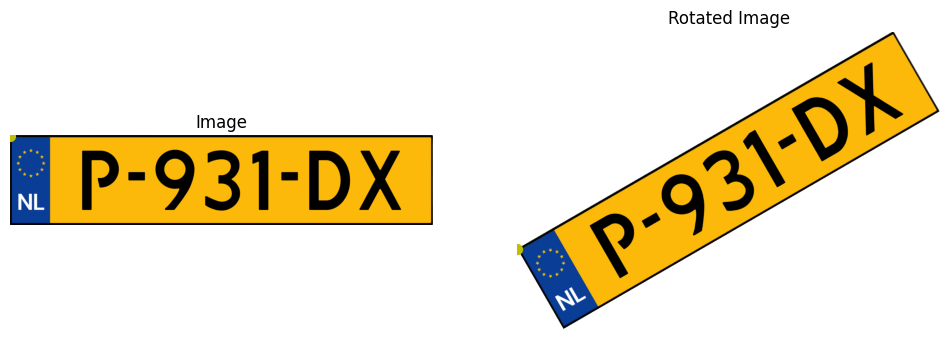

In [37]:
from pathlib import Path
from typing import Tuple

import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

def main(image_path_: Path, angle: float, pixel_coordinates: Tuple[int, int]) -> None:
    """
    Entry point.

    Parameters
    ----------
    image_path_ : Path
    angle : float
    pixel_coordinates : Tuple[int, int]

    """
    image = Image.open(image_path_)
    rotated_image = rotate_image(image, angle_)
    transformed_pixel_coordinates = transform_pixel_coordinates(
        pixel_coordinates, angle, image, rotated_image
    )
    draw_images(image, rotated_image, pixel_coordinates_, transformed_pixel_coordinates)


def rotate_image(image: Image, angle: float) -> Image:
    """
    Rotate image.

    Parameters
    ----------
    image : Image
    angle : float

    Returns
    -------
    Image

    """
    return image.rotate(angle, expand=True)


def transform_pixel_coordinates(
    pixel_coordinates: Tuple[int, int],
    angle: float,
    image: Image,
    rotated_image: Image,
) -> Tuple[int, int]:
    """
    Transform pixel coordinates.

    Parameters
    ----------
    pixel_coordinates : Tuple[int, int]
    angle : float
    image : Image
    rotated_image : Image

    Returns
    -------
    Tuple[int, int]

    """

    x, y = pixel_coordinates

    center = (image.width / 2, image.height / 2)
    transformed_center = (rotated_image.width / 2, rotated_image.height / 2)

    angle_radians = -np.deg2rad(angle)

    x -= center[0]
    y -= center[1]

    x_transformed = x * np.cos(angle_radians) - y * np.sin(angle_radians)
    y_transformed = x * np.sin(angle_radians) + y * np.cos(angle_radians)

    x_transformed += transformed_center[0]
    y_transformed += transformed_center[1]

    return int(x_transformed), int(y_transformed)


def draw_images(
    image, rotated_image, pixel_coordinates, transformed_pixel_coordinates
) -> None:
    """
    Draw images and pixel.

    Parameters
    ----------
    image : Image
    rotated_image : Image
    pixel_coordinates : Tuple[int, int]
    transformed_pixel_coordinates : Tuple[int, int]

    """
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].imshow(image)
    axes[0].scatter(*pixel_coordinates, color="y", s=50)
    axes[0].set_title("Image")
    axes[0].axis("off")

    axes[1].imshow(rotated_image)
    axes[1].scatter(*transformed_pixel_coordinates, color="y", s=50)
    axes[1].set_title("Rotated Image")
    axes[1].axis("off")
    plt.show()



image_path = Path("license_plate.png")
angle_ = 30
pixel_coordinates_ = (0, 0)
main(image_path, angle_, pixel_coordinates_)